In [37]:
# from google.colab import files
# files.upload()

In [38]:
# !pip install -q kaggle

In [39]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [40]:
# !ls ~/.kaggle

In [41]:
# !chmod 600 /root/.kaggle/kaggle.json

In [42]:
# !kaggle competitions download -c digit-recognizer

In [43]:
# !unzip -q train.csv.zip -d .
# !unzip -q test.csv.zip -d .

In [44]:
import os
os.listdir('../input/digit-recognizer')

['train.csv', 'test.csv', 'sample_submission.csv']

In [101]:
#Import Libraries and Data
import pandas as pd
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [103]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [106]:
# Split into features and labels
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

In [107]:
# Normalize the data and convert to type float32
X_train = X_train.astype('float32')
X_test = test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [108]:
# Reshape image in 3 dimensions 
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)

In [109]:
X_train.shape

(42000, 28, 28, 1)

In [110]:
# Convert shape 28.28.1 into 32.32.3
X_train = np.pad(X_train, ((0,0), (2,2), (2,2), (0,0)), mode='constant')
X_train = np.squeeze(X_train, axis=-1)
X_train = stacked_img = np.stack((X_train,)*3, axis=-1)

In [56]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [57]:
# Set the random seed
random_seed = 2

In [58]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

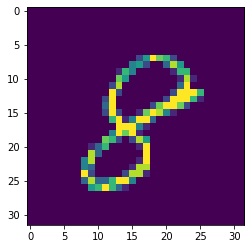

In [59]:
# Sample
g = plt.imshow(X_train[0][:,:,0])

In [62]:
# data augmentation 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

With EfficientNetB7

In [67]:
# Model
import keras
from tensorflow.keras.applications import EfficientNetB7

inp = keras.layers.Input(shape=(32,32,3))
output = EfficientNetB7(weights='imagenet', input_shape = (32,32,3), include_top=False)(inp)
output.trainable = False
x = keras.layers.Flatten()(output)
x = keras.layers.Dense(units=1024, use_bias=True, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(.5)(x)
x = keras.layers.Dense(units=10, use_bias=True, activation='softmax')(x)

opt = keras.optimizers.Adagrad(lr=0.001, decay=1e-6)
model = Model(inputs = inp, outputs = x)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
print(opt)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, 1, 1, 2560)        64097687  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2622464   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [68]:
# from keras.callbacks import LearningRateScheduler
# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
history = model.fit(X_train,Y_train, validation_data = (X_val,Y_val), batch_size=64,epochs=20,verbose=1 )

Epoch 1/20
591/591 [==============================] - 96s 162ms/step - loss: 1.4211 - accuracy: 0.5674 - val_loss: 3.3909 - val_accuracy: 0.1098
Epoch 2/20
591/591 [==============================] - 89s 150ms/step - loss: 0.4870 - accuracy: 0.8557 - val_loss: 0.3234 - val_accuracy: 0.9050
Epoch 3/20
591/591 [==============================] - 90s 152ms/step - loss: 0.3152 - accuracy: 0.9100 - val_loss: 0.1433 - val_accuracy: 0.9569
Epoch 4/20
591/591 [==============================] - 90s 152ms/step - loss: 0.2463 - accuracy: 0.9285 - val_loss: 0.1348 - val_accuracy: 0.9588
Epoch 5/20
591/591 [==============================] - 90s 152ms/step - loss: 0.2011 - accuracy: 0.9420 - val_loss: 0.1322 - val_accuracy: 0.9607
Epoch 6/20
591/591 [==============================] - 88s 150ms/step - loss: 0.1763 - accuracy: 0.9489 - val_loss: 0.0976 - val_accuracy: 0.9705
Epoch 7/20
591/591 [==============================] - 90s 152ms/step - loss: 0.1555 - accuracy: 0.9554 - val_loss: 0.0806 - val_ac

Prediction and Performance

[0.5674338340759277, 0.8556878566741943, 0.9099735617637634, 0.9285449981689453, 0.942037045955658, 0.9489418268203735, 0.955396831035614, 0.9595237970352173, 0.9629629850387573, 0.9656349420547485, 0.9680423140525818, 0.9689947366714478, 0.970634937286377, 0.9725925922393799, 0.9732010364532471, 0.9757407307624817, 0.9764814972877502, 0.9777513146400452, 0.9785714149475098, 0.979973554611206]


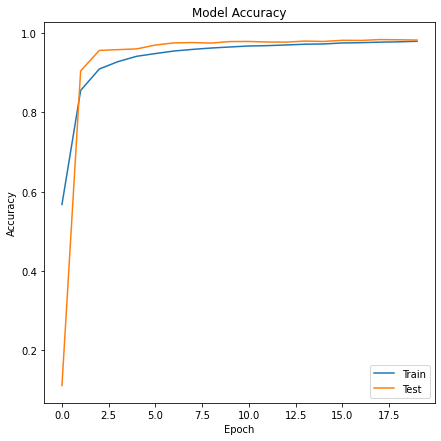

In [69]:
print(history.history['accuracy'])
plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

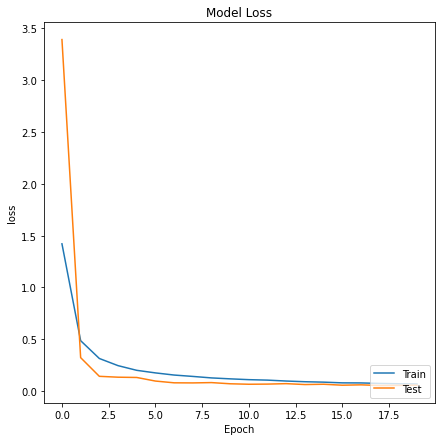

In [70]:

plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

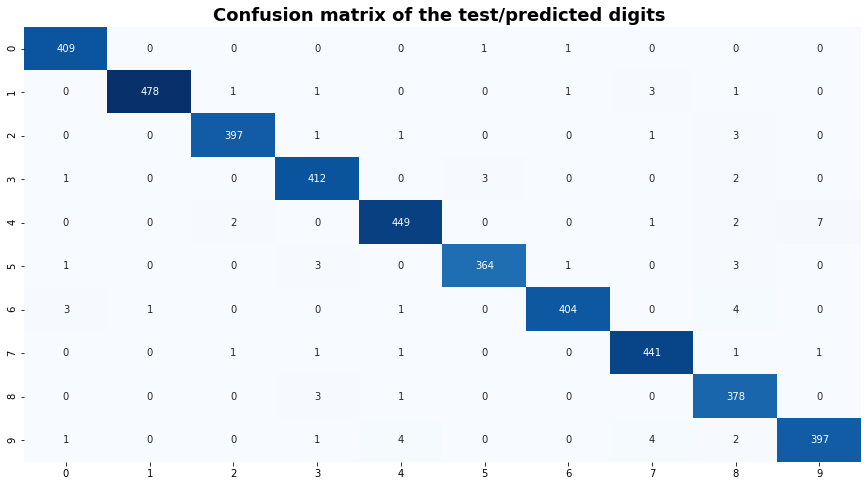

In [71]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
y_class = np.argmax(model.predict(X_val), axis = 1) 
y_check = np.argmax(Y_val, axis = 1) 
cmatrix = confusion_matrix(y_check, y_class)
plt.figure(figsize=(15,8))
plt.title('Confusion matrix of the test/predicted digits ', weight='bold', fontsize=18)
sns.heatmap(cmatrix,annot=True,cmap="Blues",fmt="d",cbar=False)

(10,)
71


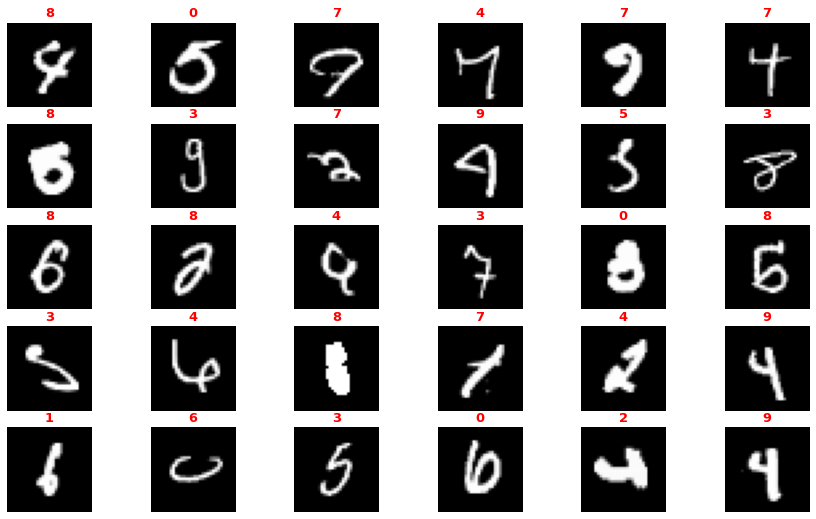

In [90]:
# Incorrectly classified Images

predicted = model.predict(X_val)
print(predicted[0].shape)
class_y = np.argmax(Y_val,axis = 1) 
class_num=np.argmax(predicted, axis=1)
#Detect the errors
errors = (class_num - class_y != 0)
#Localize the error images
predicted_er = predicted[errors]
y_test_er = Y_val[errors]
x_test_er = X_val[errors]

                
# Plot the misclassified numbers
plt.figure(figsize=(15,9))
print(x_test_er.shape[0])
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(x_test_er[i],cmap='binary')
    plt.title( np.argmax(predicted_er[i]), size=13, weight='bold', color='red')
    plt.axis("off")


Testing with test Images

In [99]:
X_test = X_test.values.reshape(X_test.shape[0],28,28,1)
X_test = np.pad(X_test, ((0,0), (2,2), (2,2), (0,0)), mode='constant')
X_test = np.squeeze(X_test, axis=-1)
X_test = stacked_img = np.stack((X_test,)*3, axis=-1)

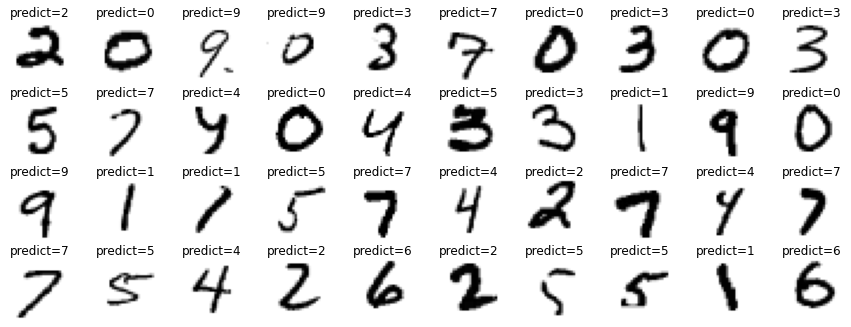

In [100]:
results = np.zeros( (X_test.shape[0],10) ) 
results = results + model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

X_test1a = test / 255.0
X_test1a = X_test1a.values.reshape(-1,28,28,1)

plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_test1a[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % results[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()